## Assignment 1a: Machine Learning Methods

###  name: Mohammed Ribin  |  id: a1909789

#### How can we use data analytics to predict energy usage for this house?

![download.jfif](attachment:download.jfif)

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

In [ ]:
#importing all the necessacry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### 1. Read the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving energydata_complete.csv to energydata_complete.csv


In [ ]:

df = pd.read_csv('energydata_complete.csv')

# Display the first few rows of the dataframe
df.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### 2. Analyse and visualise the data

In [ ]:
# Perform basic statistical analysis
summary_statistics = df.describe()
print(summary_statistics)


         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576    

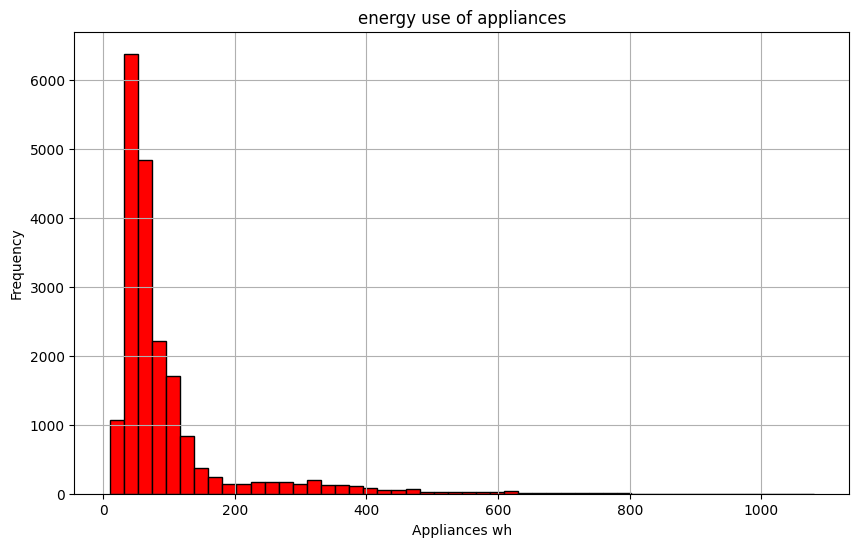

In [20]:
#visualization of the data using a histogram
#plotting energy use of appliances in a low-energy house
plt.figure(figsize=(10, 6))
plt.hist(df ['Appliances'], bins=50, color='red', edgecolor= "black")
plt.title('energy use of appliances')
plt.xlabel('Appliances wh')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

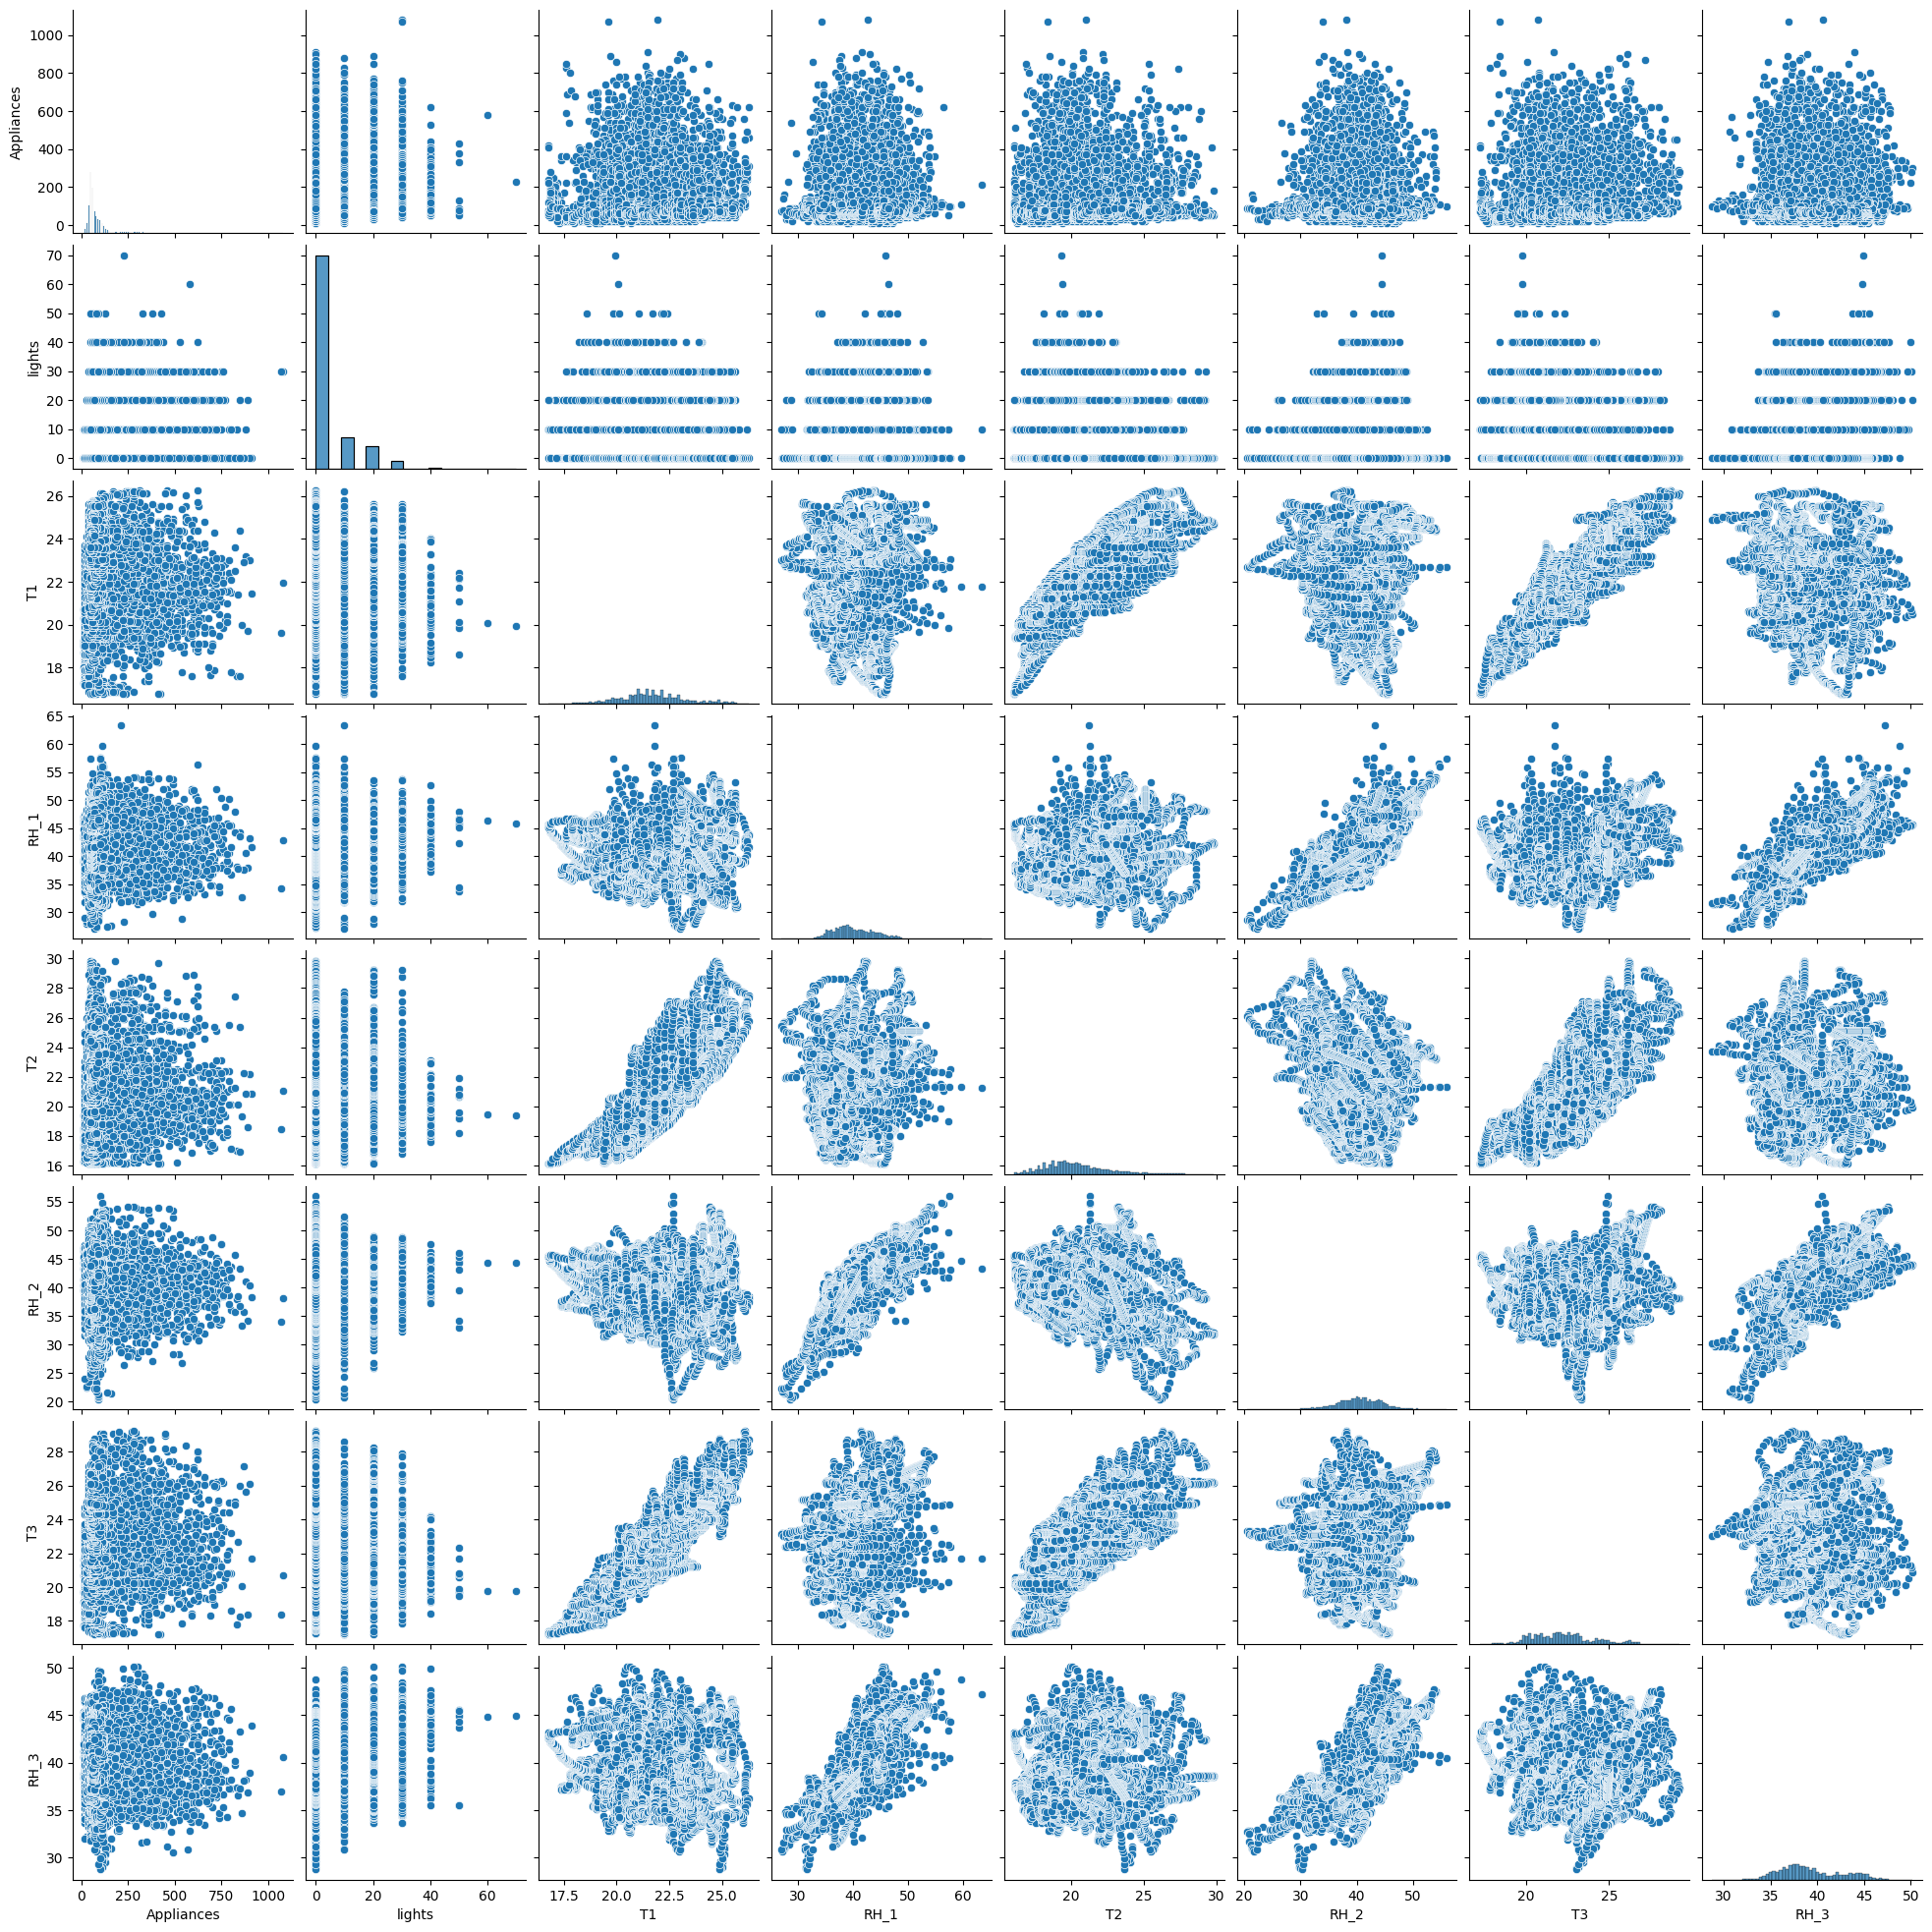

In [14]:
#Pair plot showing relationships between the energy consumption of appliances for selected features
sf = ['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3']
sns.pairplot(df[sf])
plt.show()

This pairs plot will allow you to visually explore the relationships between the energy consumption of appliances and the other variables specified, including lights, temperature (T1, T2, T3), and relative humidity (RH1, RH2, RH3). It can help you identify patterns, correlations, and trends in the data.







correlation matrix heatmap

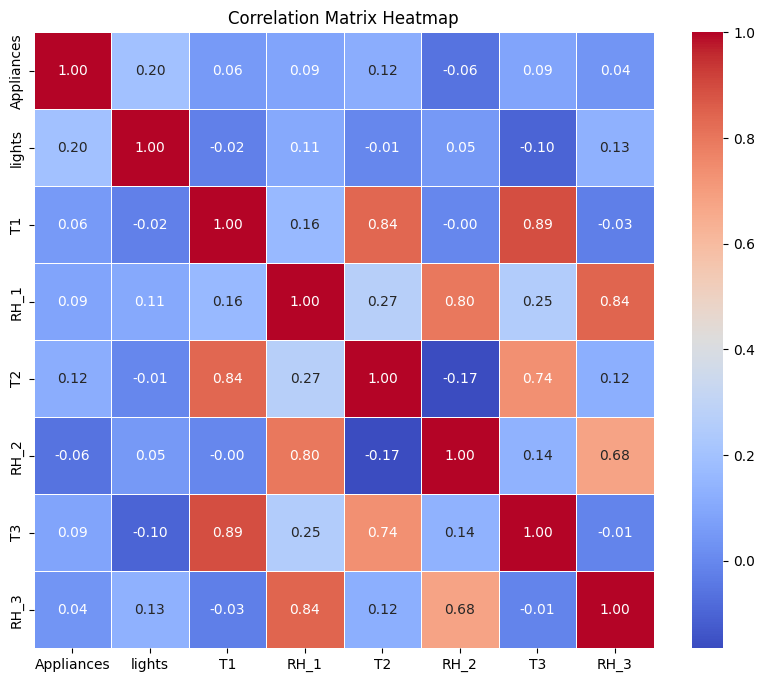

In [16]:
# Correlation matrix Heatmap
df_selected = df[sf]
cmh = df_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cmh, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Box plot

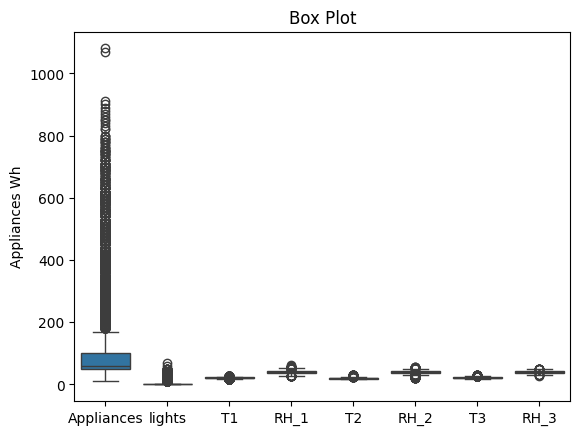

In [23]:
sns.boxplot(df[sf])
plt.title('Box Plot')
plt.ylabel('Appliances Wh')
plt.show()

Appliances energy consumption measurement

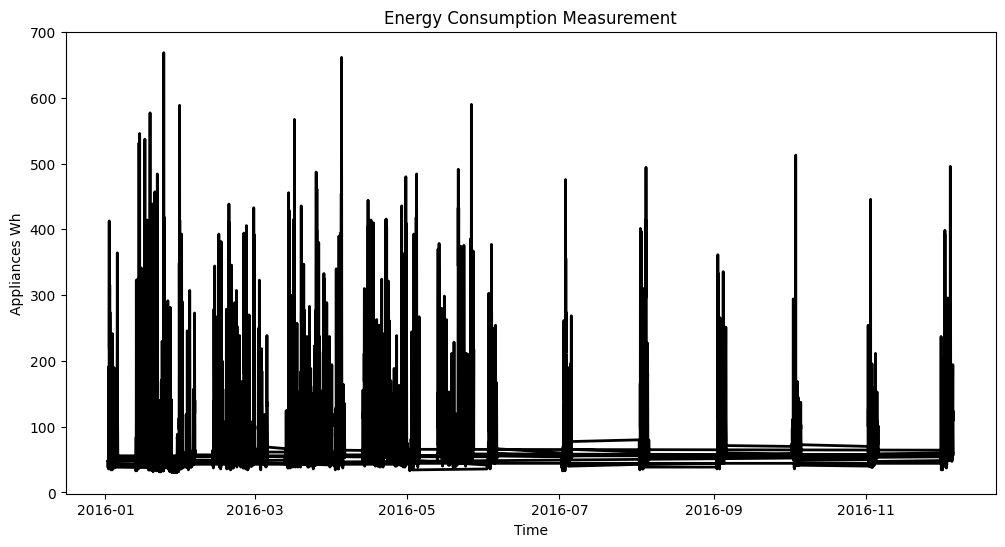

In [28]:
# Smooth the data using a rolling average with a window size of 7 days
smoothed_data = df['Appliances'].rolling(window=7).mean()

# Plot the smoothed data
plt.figure(figsize=(12, 6))
plt.plot(smoothed_data, color='black', linestyle='-', linewidth=2)


plt.title('Energy Consumption Measurement')
plt.xlabel('Time')
plt.ylabel('Appliances Wh')
plt.show()

### 3. Pre-process the data

In [47]:
# Handling missing values
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('Appliances', axis=1)
y = df['Appliances']

# handling missing values
# imputer = SimpleImputer(strategy='mean')/
# df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# data normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# scaled features into a dataframe
processed_features = pd.DataFrame(scaled_features, columns=X.columns)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

### 4. Implement, train and test prediction models

In [59]:
 # initialize a list of models
models = [
    LinearRegression(),
    SVR(kernel='rbf'),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42)
]

# Iterate through the list of models
result ={}
for model in models:
    model_name = model.__class__.__name__

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    result[model] ={}

    # Print the evaluation metrics
    print(f"Model: {model_name}")
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-squared Score:", r2)
    print("="*50)

Model: LinearRegression
Mean Squared Error: 8312.759514416259
Root Mean Squared Error: 91.17433583205451
R-squared Score: 0.16931309645532244
Model: SVR
Mean Squared Error: 9733.705938742876
Root Mean Squared Error: 98.65954560377256
R-squared Score: 0.027319143270494006
Model: GradientBoostingRegressor
Mean Squared Error: 7411.128297626061
Root Mean Squared Error: 86.08791028725265
R-squared Score: 0.2594123279218139
Model: RandomForestRegressor
Mean Squared Error: 4682.631238915632
Root Mean Squared Error: 68.42975404687373
R-squared Score: 0.532068690601408


### 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

In [62]:
# create a dictionary with the provided data
data = {
    'Model': ['LinearRegression', 'SVR', 'GradientBoostingRegressor', 'RandomForestRegressor'],
    'Root Mean Squared Error': [91.17433583205451, 98.65954560377256, 86.08791028725265, 68.42975404687373],
    'R-squared Score': [0.16931309645532244, 0.027319143270494006, 0.2594123279218139, 0.532068690601408]
}

# create a DataFrame from the dictionary
df_result = pd.DataFrame(data)

# display the DataFrame
print(df_result)

                       Model  Root Mean Squared Error  R-squared Score
0           LinearRegression                91.174336         0.169313
1                        SVR                98.659546         0.027319
2  GradientBoostingRegressor                86.087910         0.259412
3      RandomForestRegressor                68.429754         0.532069


In [53]:
# define and compute performance metrics for each model
linear_reg_metrics = {'mse': 8312.759514416259, 'rmse': 91.17433583205451, 'r2': 0.16931309645532244}
rf_reg_metrics = {'mse': 4682.631238915632, 'rmse': 68.42975404687373, 'r2': 0.532068690601408}
gb_reg_metrics = {'mse': 7411.128297626061, 'rmse': 86.08791028725265, 'r2': 0.2594123279218139}
svm_reg_metrics = {'mse': 9733.705938742876, 'rmse': 98.65954560377256, 'r2': 0.027319143270494006}

# evaluate performance metrics for each model
models = {
    'Linear Regression': linear_reg_metrics,
    'Random Forest': rf_reg_metrics,
    'Gradient Boosting': gb_reg_metrics,
    'Support Vector Machine with a radial kernel': svm_reg_metrics
}

for model_name, metrics in models.items():
    print(f"Model: {model_name}")
    print("Mean Squared Error:", metrics['mse'])
    print("Root Mean Squared Error:", metrics['rmse'])
    print("R-squared Score:", metrics['r2'])
    print("="*50)

# choose the best model based on performance metrics
best_model_name = min(models, key=lambda x: models[x]['mse'])

print(f"The best model is: {best_model_name}")


Model: Linear Regression
Mean Squared Error: 8312.759514416259
Root Mean Squared Error: 91.17433583205451
R-squared Score: 0.16931309645532244
Model: Random Forest
Mean Squared Error: 4682.631238915632
Root Mean Squared Error: 68.42975404687373
R-squared Score: 0.532068690601408
Model: Gradient Boosting
Mean Squared Error: 7411.128297626061
Root Mean Squared Error: 86.08791028725265
R-squared Score: 0.2594123279218139
Model: Support Vector Machine with a radial kernel
Mean Squared Error: 9733.705938742876
Root Mean Squared Error: 98.65954560377256
R-squared Score: 0.027319143270494006
The best model is: Random Forest


Random forest is the best model from the set of models. The performance metrics of Random forest is that, it achieved lowest values for MSE and RMSE compared to other models.It also exhibhited a high R-squared Score,indicating a good fit

It tends to handle non-linear relationship well without overfitting and also are generally less interpretable compared to linear models.

Its ensemble nature reduces overfitting and improves generalization performance compared to individual decision trees.

it is also, well-suited for regression tasks where the relationship between features and the target variable may be complex and non-linear.

Its ability to handle a large number of features and noisy data makes it suitable for a wide range of regression problems.

The R-squared score provide a great insight of the performance of the model. It is evident that Random forest out performes all the other models that we initilized here, indicating the fact the it is better explaing the varinace in our data. This suggests that Random Forest may be more suitable for our problem domain due to its higher predictive accuracy.Additionally, it's worth exploring potential improvements to all models through feature engineering, algorithm tuning, or considering alternative approaches.


### 6. Reflect on what you have learned by completing this assignment and how to improve the models

By completing this assignment i have helped me in increasing my knowledge in various modeling techniques and how to use for evalute model performace effectively. I have learned to consider factors like performance metrics, model complexity, and interpretability when selecting the best model for a given problem.This has shown me the importance of finding a balance between model accuracy, complexity, and ease of interpretation to get the best outcomes.






To improve models, several steps can be implemented. Firstly,

feature engineering enhances model performance by refining features, including selecting relevant ones, combining existing ones, or creating new ones for broader insights.

Hyperparameter tuning adjusts model parameters to optimize performance, often utilizing methods like grid search.

Cross-validation ensures model stability and reliability across diverse datasets. Ensemble methods combine multiple models to leverage their collective strengths, enhancing predictive accuracy through techniques like bagging and boosting.

Error analysis uncovers patterns and areas for improvement, involving the examination of misclassifications and refining assumptions.

Model selection involves experimenting with various algorithms and architectures to suit the problem's requirements, striking a balance between complexity, interpretability, and performance.

Data augmentation expands datasets, enhancing model robustness, especially in limited-data scenarios.

Continuous learning ensures staying abreast of machine learning and data science advancements, fostering skill and knowledge expansion.

Through these strategies and ongoing model refinement, enhanced performance and deeper insights from data can be achieved.









### 7. References